# Data Analysis: LeNet-5 x FashionMNIST

*Version History*

* **4.0** - Analyze results of grid search (*batch size* x *learning rate*)
* **4.1** - Modify figures, check overfitting and analyze results of second grid search (*momentum* x *weight decay*)
* **4.2** - Analyze results of data augmentation experiments (*horizontal flipping* & *random cropping*)
* **4.3** - Analyze results of grid search addressing *LR schedule*
* **4.4** - Analyze results of control experiments of *random cropping* grid search
* **4.5** - Modify figures
* **4.6** - Analyze results of final grid search (incl. cross-validation)
* **4.7** - Modify overfitting figure
* **4.8** - Modify figure illustrating results of final cross-validation
* **4.9** - Change color palettes of figures
* **4.10** - Clean up code, vastly improve code to produce figures


## Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D
from PIL import Image
from pyfonts import load_font
from torchvision.transforms.v2 import Pad

from src.utils.data import *
from src.visualization.color import get_color
from src.visualization.datasets import *
from src.visualization.saving import save_figure, save_image


# Custom font & color for plotting purposes
indie_flower = load_font(
   font_url="https://github.com/google/fonts/blob/main/ofl/indieflower/IndieFlower-Regular.ttf?raw=true"
)
anthracite = get_color("anthracite", tint=0.2)
anthracite_light = get_color("anthracite", tint=0.75)

## Grid Search: Batch Size x Learning Rate


### Analyze Training Results

In [2]:
# Load and prepare data
b_lr = parse_log_dir(
    "../out/lenet_fashionmnist/grid_search/batch_size_lr/2024-09-03_22-52-15",
    get_training_results,
    mode="val"
)
b_lr = b_lr.drop(columns="Accuracy@5")
b_lr = b_lr.rename(columns={"Accuracy@1": "Acc@1"})
b_lr = b_lr[["b", "lr", "Acc@1", "Loss", "Epochs"]]
b_lr

,b,lr,Acc@1,Loss,Epochs
0,8,0.001,0.896,0.288,12
1,8,0.010,0.871,0.371,8
2,8,0.100,0.100,2.315,4
3,16,0.001,0.895,0.293,16
4,16,0.010,0.878,0.328,4
5,16,0.100,0.100,2.308,2
6,32,0.001,0.896,0.298,30
7,32,0.010,0.894,0.306,12
8,32,0.100,0.665,0.875,15
9,64,0.001,0.884,0.317,26


In [3]:
# Display results grouped by learning rate
for lr, group in b_lr.groupby("lr"):
    print(f"\033[1mLEARNING RATE: {lr}\033[0m")
    print(group[["b", "Acc@1", "Loss", "Epochs"]].to_string(index=False))
    print("\n")

LEARNING RATE: 0.001
   b  Acc@1  Loss  Epochs
   8  0.896 0.288      12
  16  0.895 0.293      16
  32  0.896 0.298      30
  64  0.884 0.317      26
 128  0.881 0.328      40
 256  0.877 0.339      64
 512  0.862 0.390      67
1024  0.848 0.429     100
2048  0.795 0.564      99
4096  0.737 0.694      98


LEARNING RATE: 0.01
   b  Acc@1  Loss  Epochs
   8  0.871 0.371       8
  16  0.878 0.328       4
  32  0.894 0.306      12
  64  0.896 0.292      10
 128  0.892 0.303      13
 256  0.890 0.304      17
 512  0.895 0.298      35
1024  0.887 0.314      46
2048  0.871 0.355      44
4096  0.874 0.349      92


LEARNING RATE: 0.1
   b  Acc@1  Loss  Epochs
   8  0.100 2.315       4
  16  0.100 2.308       2
  32  0.665 0.875      15
  64  0.851 0.432      13
 128  0.876 0.342      10
 256  0.879 0.332      17
 512  0.888 0.319      17
1024  0.883 0.321      21
2048  0.880 0.339      38
4096  0.541 1.366       1




In [4]:
# Display results grouped by batch size
for b, group in b_lr.groupby("b"):
    print(f"\033[1mBATCH SIZE: {b}\033[0m")
    print(group[["lr", "Acc@1", "Loss", "Epochs"]].to_string(index=False))
    print("\n")

BATCH SIZE: 8
   lr  Acc@1  Loss  Epochs
0.001  0.896 0.288      12
0.010  0.871 0.371       8
0.100  0.100 2.315       4


BATCH SIZE: 16
   lr  Acc@1  Loss  Epochs
0.001  0.895 0.293      16
0.010  0.878 0.328       4
0.100  0.100 2.308       2


BATCH SIZE: 32
   lr  Acc@1  Loss  Epochs
0.001  0.896 0.298      30
0.010  0.894 0.306      12
0.100  0.665 0.875      15


BATCH SIZE: 64
   lr  Acc@1  Loss  Epochs
0.001  0.884 0.317      26
0.010  0.896 0.292      10
0.100  0.851 0.432      13


BATCH SIZE: 128
   lr  Acc@1  Loss  Epochs
0.001  0.881 0.328      40
0.010  0.892 0.303      13
0.100  0.876 0.342      10


BATCH SIZE: 256
   lr  Acc@1  Loss  Epochs
0.001  0.877 0.339      64
0.010  0.890 0.304      17
0.100  0.879 0.332      17


BATCH SIZE: 512
   lr  Acc@1  Loss  Epochs
0.001  0.862 0.390      67
0.010  0.895 0.298      35
0.100  0.888 0.319      17


BATCH SIZE: 1024
   lr  Acc@1  Loss  Epochs
0.001  0.848 0.429     100
0.010  0.887 0.314      46
0.100  0.883 0.321      2

### Analyze Training Durations

In [5]:
# Load and parse training durations (seconds per epoch for each individual epoch)
training_durations = parse_log_dir(
    "../out/lenet_fashionmnist/grid_search/batch_size_lr/2024-09-03_22-52-15",
    get_training_durations
)

# Compute mean and standard error per batch size
duration_stats = training_durations.groupby("b")["duration"].agg(["mean", "sem"]).reset_index()

# Find best learning rate per batch size (in terms of loss) and corresponding number of epochs trained for
best_lr = b_lr.loc[b_lr.groupby("b")["Loss"].idxmin(), ["b", "lr", "Epochs"]]
duration_stats = pd.merge(duration_stats, best_lr, on="b")
duration_stats

,b,mean,sem,lr,Epochs
0,8,56.019923,0.192281,0.001,12
1,16,32.885595,0.246686,0.001,16
2,32,17.939264,0.018054,0.001,30
3,64,11.052156,0.010747,0.010,10
4,128,8.205487,0.006392,0.010,13
5,256,6.649885,0.003555,0.010,17
6,512,5.963813,0.003601,0.010,35
7,1024,5.446548,0.002352,0.010,46
8,2048,5.192625,0.002385,0.100,38
9,4096,4.960276,0.001986,0.010,92


### Visualize Training Durations

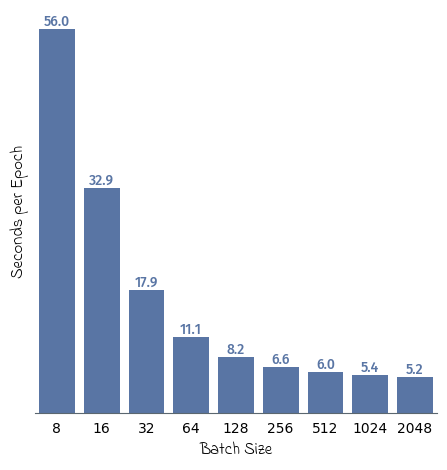

In [6]:
# Exclude batch size of 4096 from results
filtered_duration_stats = duration_stats[duration_stats["b"] != 4096]

# Plot data
with sns.axes_style({"axes.edgecolor": anthracite}):
    with sns.color_palette("deep"):
        ax = sns.barplot(
            data=filtered_duration_stats,
            x="b",
            y="mean"
        )

# Add axis labels
ax.set_xlabel("Batch Size", font=indie_flower, size=12)
ax.set_ylabel("Seconds per Epoch", font=indie_flower, size=12)

# Add bar labels
ax.bar_label(
    ax.containers[0],
    fmt="%.1f",
    fontname="Fira Sans",
    weight="roman",
    color=ax.containers[0][0].get_facecolor()
)

# Control figure aesthetics
ax.set_box_aspect(1)
sns.despine(ax=ax, left=True)
ax.tick_params(left=False, bottom=False, labelleft=False)
plt.tight_layout()

fig_seconds_per_epoch = ax.get_figure()
plt.show()

In [7]:
save_figure(
    fig_seconds_per_epoch,
    "../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr/seconds_per_epoch.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr/seconds_per_epoch.png.


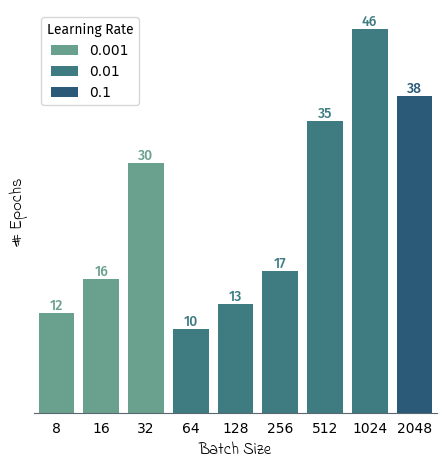

In [8]:
# Plot data
with sns.axes_style({"axes.edgecolor": anthracite}):
    ax = sns.barplot(
        data=filtered_duration_stats,
        x="b",
        y="Epochs",
        hue="lr",
        palette=sns.color_palette("crest", 3)
    )

# Add axis labels
ax.set_xlabel("Batch Size", font=indie_flower, size=12)
ax.set_ylabel("# Epochs", font=indie_flower, size=12)

# Customize legend
ax.legend(
    title="Learning Rate",
    title_fontproperties=FontProperties(family="Fira Sans")
)

# Add bar labels
for grouped_bars in ax.containers:
    for bar in grouped_bars:
        # Mimic label positioning of ax.bar_label() with paddding=0
        (x0, _), (x1, y1) = bar.get_bbox().get_points()
        xc = (x0 + x1) / 2
        xy = xc, y1
        xytext = 0, 0
        lbl = f"{y1:.0f}"
        ax.annotate(
            lbl, xy, xytext, textcoords="offset points", ha="center", va="bottom",
            fontname="Fira Sans",
            weight="roman",
            color=bar.get_facecolor()
        )

# Control figure aesthetics
ax.set_box_aspect(1)
sns.despine(ax=ax, left=True)
ax.tick_params(left=False, bottom=False, labelleft=False)
plt.tight_layout()

fig_num_epochs = ax.get_figure()
plt.show()

In [9]:
save_figure(
    fig_num_epochs,
    "../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr/num_epochs.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr/num_epochs.png.


## Overfitting

In [10]:
# Load and prepare data
overfitting = parse_tb_data("../out/lenet_fashionmnist/grid_search/overfitting/2024-10-16_11-55-43")
overfitting = overfitting[overfitting["metric"] == "Loss"]
overfitting = overfitting.sort_values(by=["b", "wd", "run_id", "mode", "metric", "step"], ascending=True)
overfitting.reset_index(drop=True, inplace=True)

# Convert "step" column from # samples to # epochs
dataset_size = 60000
num_folds = 5
val_set_size = dataset_size / num_folds
train_set_size = dataset_size - val_set_size
overfitting["step"] = overfitting.apply(
    lambda row: row["step"] / (val_set_size if row["mode"] == "Val" else train_set_size),
    axis=1
)

# Compute exponentially weighted moving average (adapted from https://stackoverflow.com/questions/58002668)
alpha = 0.6
overfitting["smooth_wt"] = alpha
overfitting["value"] = overfitting.groupby(
    ["global_id", "mode", "metric"]
)["value"].transform(lambda x: x.ewm(alpha=alpha).mean())
overfitting

# Modify columns for plotting purposes
overfitting["mode"] = overfitting["mode"].transform(lambda x: "Training" if x == "Train" else "Validation")
overfitting["wd"] = overfitting["wd"].transform(lambda x: "1e-4" if x == 0.0001 else "1e-3")
overfitting

,global_id,run_id,b,wd,mode,metric,step,value,smooth_wt
0,11,1,64,1e-4,Training,Loss,0.100000,1.831633,0.6
1,11,1,64,1e-4,Training,Loss,0.200000,1.223751,0.6
2,11,1,64,1e-4,Training,Loss,0.300000,0.926663,0.6
3,11,1,64,1e-4,Training,Loss,0.400000,0.765030,0.6
4,11,1,64,1e-4,Training,Loss,0.500000,0.671909,0.6
...,...,...,...,...,...,...,...,...,...
11995,10,5,128,1e-3,Validation,Loss,29.608000,0.302732,0.6
11996,10,5,128,1e-3,Validation,Loss,29.704000,0.292683,0.6
11997,10,5,128,1e-3,Validation,Loss,29.800000,0.274998,0.6
11998,10,5,128,1e-3,Validation,Loss,29.906667,0.281095,0.6


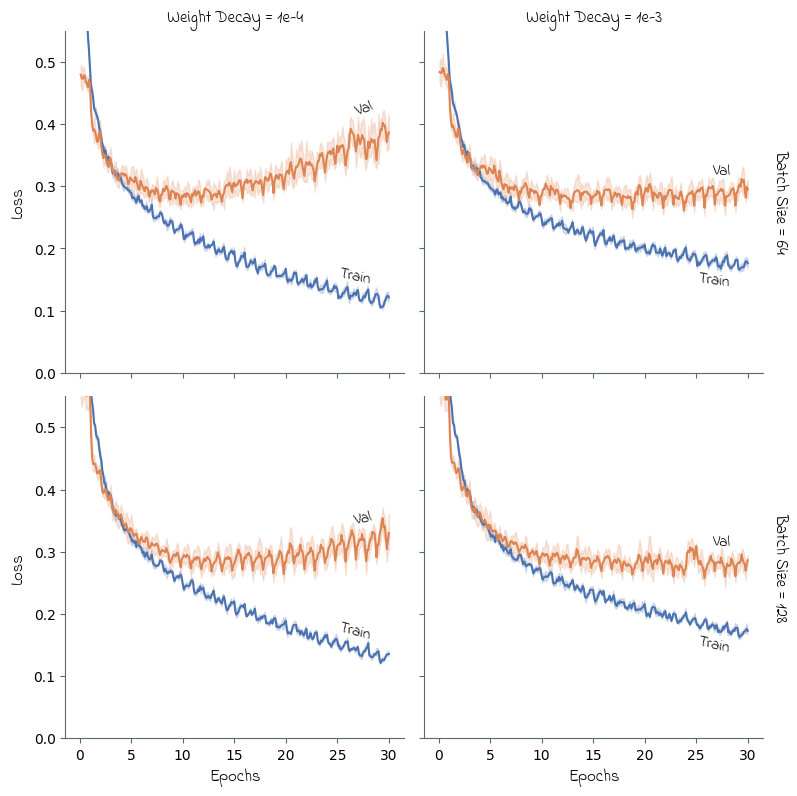

In [11]:
with sns.axes_style({"axes.edgecolor": anthracite}):
    g = sns.FacetGrid(
        overfitting,
        row="b",
        col="wd",
        hue="mode",
        palette="deep",
        height=4,
        margin_titles=True,
        ylim=(0, 0.55)
    )
    g.map(sns.lineplot, "step", "value")

# Add axis labels and modify margin titles
g.set_axis_labels("Epochs", "Loss", font=indie_flower, size=12)
g.set_titles(
    row_template="Batch Size = {row_name}",
    col_template="Weight Decay = {col_name}",
    font=indie_flower,
    size=12
)

# Annotate lines
label_train = {
    "pos": {
        (64, "1e-4"): (25, 0.135),
        (64, "1e-3"): (25, 0.13),
        (128, "1e-4"): (25, 0.15),
        (128, "1e-3"): (25, 0.13)
    },
    "rot": {
        (64, "1e-4"): -12,
        (64, "1e-3"): -8,
        (128, "1e-4"): -15,
        (128, "1e-3"): -13
    }
}
label_val = {
    "pos": {
        (64, "1e-4"): (26.5, 0.405),
        (64, "1e-3"): (26.5, 0.31),
        (128, "1e-4"): (26.5, 0.335),
        (128, "1e-3"): (26.5, 0.30)
    },
    "rot": {
        (64, "1e-4"): 22,
        (64, "1e-3"): 0,
        (128, "1e-4"): 15,
        (128, "1e-3"): 0
    }
}
for (b, wd), ax in g.axes_dict.items():
    ax.text(
        label_train["pos"][(b, wd)][0],
        label_train["pos"][(b, wd)][1],
        "Train",
        ha="left",
        va="bottom",
        rotation=label_train["rot"][(b, wd)],
        font=indie_flower,
        size=11
    )
    ax.text(
        label_val["pos"][(b, wd)][0],
        label_val["pos"][(b, wd)][1],
        "Val",
        ha="left",
        va="bottom",
        rotation=label_val["rot"][(b, wd)],
        font=indie_flower,
        size=11
    )

# Control figure aesthetics
g.tick_params(color=anthracite)

fig_overfitting = g.figure
plt.show()

In [12]:
save_figure(
    fig_overfitting,
    "../reports/figures/lenet_fashionmnist/grid_search/overfitting/train_vs_val_loss.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/overfitting/train_vs_val_loss.png.


## Grid Search: Momentum x Weight Decay


### Analyze Training Results

In [13]:
# Load and prepare data
momentum_wd = parse_log_dir(
    "../out/lenet_fashionmnist/grid_search/momentum_wd/2024-09-20_22-02-49",
    get_training_results,
    mode="val"
)
momentum_wd = momentum_wd.drop(columns="Accuracy@5")
momentum_wd = momentum_wd.rename(columns={"Accuracy@1": "Acc@1"})
momentum_wd

,momentum,wd,Loss,Acc@1,Epochs
0,0.70,0.000001,0.297,0.893,16
1,0.70,0.000010,0.295,0.894,16
2,0.70,0.000100,0.298,0.891,16
3,0.70,0.001000,0.285,0.898,24
4,0.70,0.010000,0.332,0.883,50
5,0.80,0.000001,0.289,0.893,12
6,0.80,0.000010,0.288,0.896,16
7,0.80,0.000100,0.287,0.896,16
8,0.80,0.001000,0.281,0.898,16
9,0.80,0.010000,0.336,0.879,50


In [14]:
# Display results grouped by weight decay
for wd, group in momentum_wd.groupby("wd"):
    print(f"\033[1mWEIGHT DECAY: {wd}\033[0m")
    print(group[["momentum", "Acc@1", "Loss", "Epochs"]].to_string(index=False))
    print("\n")

WEIGHT DECAY: 1e-06
 momentum  Acc@1  Loss  Epochs
     0.70  0.893 0.297      16
     0.80  0.893 0.289      12
     0.85  0.896 0.296      16
     0.90  0.895 0.293      10
     0.95  0.889 0.321      10
     0.99  0.821 0.519      11


WEIGHT DECAY: 1e-05
 momentum  Acc@1  Loss  Epochs
     0.70  0.894 0.295      16
     0.80  0.896 0.288      16
     0.85  0.893 0.297      12
     0.90  0.897 0.294      10
     0.95  0.890 0.309      11
     0.99  0.808 0.560      12


WEIGHT DECAY: 0.0001
 momentum  Acc@1  Loss  Epochs
     0.70  0.891 0.298      16
     0.80  0.896 0.287      16
     0.85  0.897 0.297      17
     0.90  0.896 0.292      10
     0.95  0.891 0.312       9
     0.99  0.848 0.429      50


WEIGHT DECAY: 0.001
 momentum  Acc@1  Loss  Epochs
     0.70  0.898 0.285      24
     0.80  0.898 0.281      16
     0.85  0.895 0.284      16
     0.90  0.897 0.286      23
     0.95  0.898 0.286      28
     0.99  0.835 0.474      10


WEIGHT DECAY: 0.01
 momentum  Acc@1  Loss  

In [15]:
# Display results grouped by momentum
for momentum, group in momentum_wd.groupby("momentum"):
    print(f"\033[1mMOMENTUM: {momentum}\033[0m")
    print(group[["wd", "Acc@1", "Loss", "Epochs"]].to_string(index=False))
    print("\n")

MOMENTUM: 0.7
      wd  Acc@1  Loss  Epochs
0.000001  0.893 0.297      16
0.000010  0.894 0.295      16
0.000100  0.891 0.298      16
0.001000  0.898 0.285      24
0.010000  0.883 0.332      50


MOMENTUM: 0.8
      wd  Acc@1  Loss  Epochs
0.000001  0.893 0.289      12
0.000010  0.896 0.288      16
0.000100  0.896 0.287      16
0.001000  0.898 0.281      16
0.010000  0.879 0.336      50


MOMENTUM: 0.85
      wd  Acc@1  Loss  Epochs
0.000001  0.896 0.296      16
0.000010  0.893 0.297      12
0.000100  0.897 0.297      17
0.001000  0.895 0.284      16
0.010000  0.880 0.340      65


MOMENTUM: 0.9
      wd  Acc@1  Loss  Epochs
0.000001  0.895 0.293      10
0.000010  0.897 0.294      10
0.000100  0.896 0.292      10
0.001000  0.897 0.286      23
0.010000  0.875 0.351      32


MOMENTUM: 0.95
      wd  Acc@1  Loss  Epochs
0.000001  0.889 0.321      10
0.000010  0.890 0.309      11
0.000100  0.891 0.312       9
0.001000  0.898 0.286      28
0.010000  0.872 0.365      49


MOMENTUM: 0.99
   

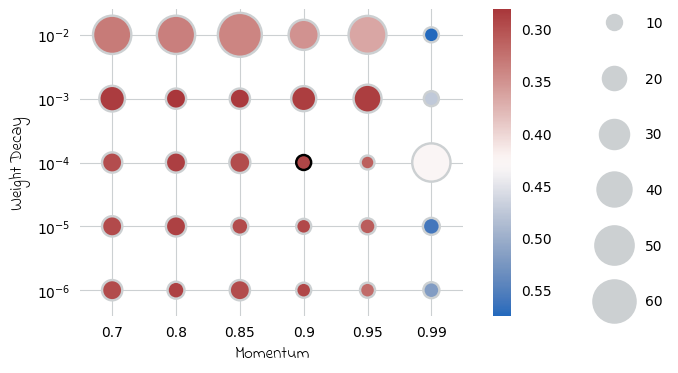

In [16]:
# Convert grid search parameters to strings -> "categorical" placement of scatter points
momentum_wd[["momentum", "wd"]] = momentum_wd[["momentum", "wd"]].astype(str)

# Plot data
with sns.axes_style({"axes.axisbelow": True}):
    g = sns.relplot(
        data=momentum_wd,
        x="momentum",
        y="wd",
        hue="Loss",
        palette=sns.color_palette("vlag_r", as_cmap=True),
        size="Epochs",
        size_norm=(momentum_wd["Epochs"].min(), momentum_wd["Epochs"].max()),
        sizes=(100, 1000),
        linewidths=1.75
    )
    ax = g.ax

# Add axis labels
ax.set_xlabel("Momentum", font=indie_flower, size=12)
ax.set_ylabel("Weight Decay", font=indie_flower, size=12)

# Modify tick labels
ax.set_yticks(range(0, 5))
ax.set_yticklabels([f"$10^{{-{x}}}$" for x in range(6, 1, -1)])

# Highlight previous run
edgecolors = [anthracite_light] * len(momentum_wd)
edgecolors[17] = "black"
g.ax.collections[0].set_edgecolor(edgecolors)

# Grab legend info
h, l = g.ax.get_legend_handles_labels()
start_idx = l.index("Epochs") + 1
epochs_dict = {
    l: h.get_markersize()
    for l, h in zip(l[start_idx:], h[start_idx:])
}
g._legend.remove()

# Colorbar: Loss
g.set(aspect="equal")
g.ax.margins(.1)
cax = g.fig.add_axes([
    g.ax.get_position().x1 + 0.05,
    g.ax.get_position().y0,
    0.03,
    g.ax.get_position().height
])
cbar = plt.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(
            vmin=momentum_wd["Loss"].min(),
            vmax=momentum_wd["Loss"].max()
        ),
        cmap=sns.color_palette("vlag_r", as_cmap=True)
    ),
    cax=cax
)
cbar.ax.invert_yaxis()
cbar.ax.tick_params(right=False)
cbar.outline.set_visible(False)

# Legend: # Epochs
epochs_handles = [
    Line2D(
        [0], [0],
        linestyle="None",
        color=anthracite_light,
        marker="o",
        markersize=v,
        markeredgewidth=1.75,
        label=k
    )
    for k, v in epochs_dict.items()
]
g.ax.legend(
    handles=epochs_handles,
    loc="center left",
    bbox_to_anchor=(1.325, 0.5),
    frameon=False,
    labelspacing=3,
    handletextpad=1.25
)

# Control figure aesthetics
sns.despine(ax=ax, left=True, bottom=True)
g.ax.tick_params(left=False, bottom=False)
g.ax.invert_yaxis()
g.ax.grid(color=anthracite_light)

fig_momentum_wd_heatmap = g.fig
plt.show()

In [17]:
save_figure(
    fig_momentum_wd_heatmap,
    "../reports/figures/lenet_fashionmnist/grid_search/momentum_wd/heatmap.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/momentum_wd/heatmap.png.


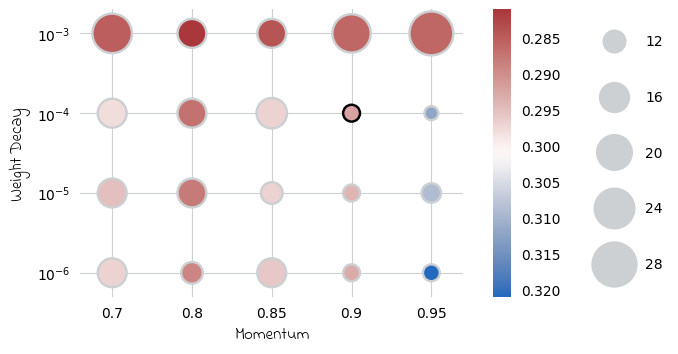

In [18]:
# Exclude parameter combinations that are clearly not performing well
momentum_wd_subset = momentum_wd.copy()
momentum_wd_subset = momentum_wd_subset.query("momentum != '0.99' and wd != '0.01'")

# Plot data
with sns.axes_style({"axes.axisbelow": True}):
    g = sns.relplot(
        data=momentum_wd_subset,
        x="momentum",
        y="wd",
        hue="Loss",
        palette=sns.color_palette("vlag_r", as_cmap=True),
        size="Epochs",
        size_norm=(momentum_wd_subset["Epochs"].min(), momentum_wd_subset["Epochs"].max()),
        sizes=(100, 1000),
        linewidths=1.75
    )
    ax = g.ax

# Add axis labels
ax.set_xlabel("Momentum", font=indie_flower, size=12)
ax.set_ylabel("Weight Decay", font=indie_flower, size=12)

# Modify tick labels
ax.set_yticks(range(0, 4))
ax.set_yticklabels([f"$10^{{-{x}}}$" for x in range(6, 2, -1)])

# Highlight previous run
edgecolors = [anthracite_light] * len(momentum_wd)
edgecolors[14] = "black"
g.ax.collections[0].set_edgecolor(edgecolors)

# Grab legend info
h, l = g.ax.get_legend_handles_labels()
start_idx = l.index("Epochs") + 1
epochs_dict = {
    l: h.get_markersize()
    for l, h in zip(l[start_idx:], h[start_idx:])
}
g._legend.remove()

# Colorbar: Loss
g.set(aspect="equal")
g.ax.margins(.1)
cax = g.fig.add_axes([
    g.ax.get_position().x1 + 0.05,
    g.ax.get_position().y0,
    0.03,
    g.ax.get_position().height
])
cbar = plt.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(
            vmin=momentum_wd_subset["Loss"].min(),
            vmax=momentum_wd_subset["Loss"].max()
        ),
        cmap=sns.color_palette("vlag_r", as_cmap=True)
    ),
    cax=cax
)
cbar.ax.invert_yaxis()
cbar.ax.tick_params(right=False)
cbar.outline.set_visible(False)

# Legend: # Epochs
epochs_handles = [
    Line2D(
        [0], [0],
        linestyle="None",
        color=anthracite_light,
        marker="o",
        markersize=v,
        markeredgewidth=1.75,
        label=k
    )
    for k, v in epochs_dict.items()
]
g.ax.legend(
    handles=epochs_handles,
    loc="center left",
    bbox_to_anchor=(1.325, 0.5),
    frameon=False,
    labelspacing=3,
    handletextpad=1.25
)

# Control figure aesthetics
sns.despine(ax=ax, left=True, bottom=True)
g.ax.tick_params(left=False, bottom=False)
g.ax.invert_yaxis()
g.ax.grid(color=anthracite_light)

fig_momentum_wd_heatmap_subset = g.fig
plt.show()

In [19]:
save_figure(
    fig_momentum_wd_heatmap_subset,
    "../reports/figures/lenet_fashionmnist/grid_search/momentum_wd/heatmap_subset.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/momentum_wd/heatmap_subset.png.


## Data Augmentation: Horizontal Flipping

In [20]:
# Load and prepare data
hflip = parse_log_dir(
    "../out/lenet_fashionmnist/data_augmentation/horizontal_flipping/2024-09-21_14-20-38",
    get_training_results,
    mode="val"
)
hflip = hflip.drop(columns="Accuracy@5")
hflip = hflip.rename(columns={"Accuracy@1": "Acc@1"})
hflip["config_id"] = hflip.groupby(["b", "momentum", "wd"]).ngroup() + 1
hflip = hflip[["config_id", *[col for col in hflip.columns if col != "config_id"]]]
hflip = hflip.sort_values(by=["config_id", "flip_p"])
hflip

,config_id,b,flip_p,momentum,wd,Loss,Acc@1,Epochs
0,1,64,0.0,0.80,0.0001,0.287,0.896,16
4,1,64,0.5,0.80,0.0001,0.290,0.902,30
1,2,64,0.0,0.80,0.0010,0.281,0.898,16
5,2,64,0.5,0.80,0.0010,0.270,0.903,48
2,3,64,0.0,0.85,0.0001,0.297,0.897,17
6,3,64,0.5,0.85,0.0001,0.288,0.894,14
3,4,64,0.0,0.85,0.0010,0.284,0.895,16
7,4,64,0.5,0.85,0.0010,0.268,0.901,30
8,5,128,0.0,0.80,0.0001,0.297,0.894,24
12,5,128,0.5,0.80,0.0001,0.292,0.897,38


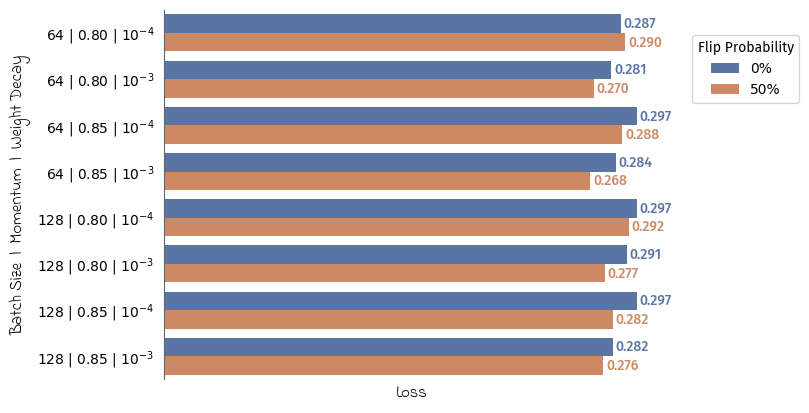

In [21]:
# Plot data
with sns.axes_style({"axes.edgecolor": anthracite}):
    ax = sns.barplot(
        data=hflip,
        x="Loss",
        y="config_id",
        orient="y",
        hue="flip_p",
        palette="deep"
    )

# Add axis labels
ax.set_xlabel("Loss", font=indie_flower, size=12)
ax.set_ylabel("Batch Size  |  Momentum  |  Weight Decay", font=indie_flower, size=12)

# Modify tick labels
wd_mapping = {
    0.0001: "$10^{-4}$",
    0.001: "$10^{-3}$"
}
config_dict = {}
for unique_id in hflip["config_id"].unique():
    data = hflip[hflip["config_id"] == unique_id].iloc[0]
    config_dict[unique_id] = f"${data['b'].astype(int)}$ | ${data['momentum']:.2f}$ | {wd_mapping[data['wd']]}"
ax.set_yticks(range(0, 8))
ax.set_yticklabels(config_dict[int(ylabel.get_text())] for ylabel in ax.get_yticklabels())

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=[f"{float(l) * 100:.0f}%" for l in labels],
    loc="upper left",
    bbox_to_anchor=(1.05, 0.95),
    title="Flip Probability",
    title_fontproperties=FontProperties(family="Fira Sans")
)

# Add bar labels
for grouped_bars in ax.containers:
    for bar in grouped_bars:
        # Mimic label positioning of ax.bar_label() with paddding=2
        (_, y0), (x1, y1) = bar.get_bbox().get_points()
        yc = (y0 + y1) / 2
        xy = x1, yc
        xytext = 2, 0
        lbl = f"{x1:.3f}"
        ax.annotate(
            lbl, xy, xytext, textcoords="offset points", ha="left", va="center",
            fontname="Fira Sans",
            weight="roman",
            color=bar.get_facecolor()
        )

# Control figure aesthetics
sns.despine(ax=ax, bottom=True)
ax.tick_params(left=False, bottom=False, labelbottom=False)

fig_hflip = ax.get_figure()
plt.show()

In [22]:
save_figure(
    fig_hflip,
    "../reports/figures/lenet_fashionmnist/data_augmentation/horizontal_flipping/effect_of_flipping.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/data_augmentation/horizontal_flipping/effect_of_flipping.png.


To understand why the improvement in performance is not as dramatic as one might have hoped, we visualize the effect of horizontally  
flipping images of the FashionMNIST dataset.

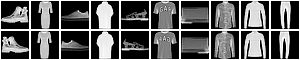

In [23]:
# Load one sample per class, add padding around each image, then flip all images
samples = load_class_samples(
    "../data/processed/FashionMNIST",
    num_samples_per_class=1
)
samples = np.array([
    Pad(padding=1, fill=255)(Image.fromarray(sample)) for sample in samples
])
flipped_samples = np.flip(samples, 2)

# Combine original and flipped samples into sprite
all_samples = np.concatenate((samples, flipped_samples))
flip_sprite = Image.fromarray(create_sprite(all_samples, 2, 10))
display(flip_sprite)

## Data Augmentation: Random Cropping


### Visualize Cropping

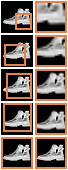

In [24]:
# Select a single image
img = Image.fromarray(load_class_samples(
    "../data/processed/FashionMNIST",
    num_samples_per_class=1
)[0])

# Visualize crops for 5 different ``crop_scale`` values
annotated_imgs = []
cropped_imgs = []
crop_scales = [0.2, 0.4, 0.6, 0.8, 1.0]
frame_color = tuple((np.array(sns.color_palette("deep")[1]) * 255).astype(int))

for crop_scale in crop_scales:
    annotated_img, cropped_img = visualize_crop(
        img=img,
        crop_scale=crop_scale,
        crop_ratio=1,
        frame_color=frame_color,
        frame_width=2
    )
    annotated_imgs.append(annotated_img)
    cropped_imgs.append(cropped_img)

all_imgs = annotated_imgs + cropped_imgs
all_imgs_np = np.array([Pad(padding=1, fill=255)(img) for img in all_imgs])

crop_sprite = Image.fromarray(create_sprite(all_imgs_np, len(crop_scales), 2, by_row=False))
display(crop_sprite)

### Analyze Training Results

In [25]:
# Load and prepare data
random_crops = parse_log_dir(
    "../out/lenet_fashionmnist/data_augmentation/random_cropping/2024-09-21_14-21-07",
    get_training_results,
    mode="val"
)
random_crops = random_crops.drop(columns="Accuracy@5")
random_crops = random_crops.rename(columns={"Accuracy@1": "Acc@1"})

# Add results from horizontal flipping experiment w/ matching parameters (--> baseline w/o random cropping)
previous_results = hflip.query("wd == 0.001 and flip_p == 0.5")
previous_results = previous_results.drop(columns=["config_id", "flip_p", "wd"])
previous_results["crop_scale.lower"] = 1.0
random_crops = pd.concat([random_crops, previous_results], axis=0)
random_crops = random_crops.sort_values(by=["b", "momentum", "crop_scale.lower"]).reset_index(drop=True)

# Add ID to identify runs with identical hparams (except for crop_scale.lower)
random_crops["config_id"] = random_crops.groupby(["b", "momentum"]).ngroup() + 1
random_crops = random_crops[["config_id", *[col for col in random_crops.columns if col != "config_id"]]]
random_crops = random_crops.sort_values(by=["config_id", "crop_scale.lower"])
random_crops

,config_id,b,crop_scale.lower,momentum,Loss,Acc@1,Epochs
0,1,64,0.6,0.80,0.270,0.898,93
1,1,64,0.7,0.80,0.274,0.899,50
2,1,64,0.8,0.80,0.267,0.901,63
3,1,64,0.9,0.80,0.260,0.904,63
4,1,64,1.0,0.80,0.270,0.903,48
5,2,64,0.6,0.85,0.267,0.898,93
6,2,64,0.7,0.85,0.268,0.899,83
7,2,64,0.8,0.85,0.262,0.902,80
8,2,64,0.9,0.85,0.258,0.907,101
9,2,64,1.0,0.85,0.268,0.901,30


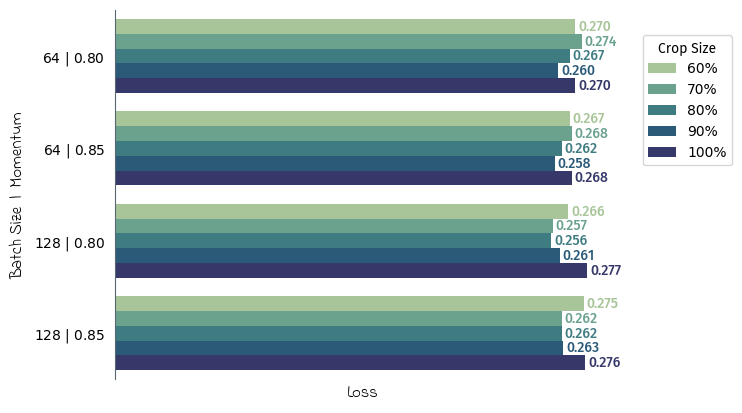

In [26]:
# Plot data
with sns.axes_style({"axes.edgecolor": anthracite}):
    ax = sns.barplot(
        data=random_crops,
        x="Loss",
        y="config_id",
        orient="y",
        hue="crop_scale.lower",
        palette="crest"
    )

# Add axis labels
ax.set_xlabel("Loss", font=indie_flower, size=12)
ax.set_ylabel("Batch Size  |  Momentum", font=indie_flower, size=12)

# Modify tick labels
config_dict = {}
for unique_id in random_crops["config_id"].unique():
    data = random_crops[random_crops["config_id"] == unique_id].iloc[0]
    config_dict[unique_id] = f"${data['b'].astype(int)}$ | ${data['momentum']:.2f}$"
ax.set_yticks(range(0, 4))
ax.set_yticklabels(config_dict[int(ylabel.get_text())] for ylabel in ax.get_yticklabels())

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=[f"{float(l) * 100:.0f}%" for l in labels],
    loc="upper left",
    bbox_to_anchor=(1.05, 0.95),
    title="Crop Size",
    title_fontproperties=FontProperties(family="Fira Sans")
)

# Add bar labels
for grouped_bars in ax.containers:
    for bar in grouped_bars:
        # Mimic label positioning of ax.bar_label() with paddding=2
        (_, y0), (x1, y1) = bar.get_bbox().get_points()
        yc = (y0 + y1) / 2
        xy = x1, yc
        xytext = 2, 0
        lbl = f"{x1:.3f}"
        ax.annotate(
            lbl, xy, xytext, textcoords="offset points", ha="left", va="center",
            fontname="Fira Sans",
            weight="roman",
            color=bar.get_facecolor()
        )

# Control figure aesthetics
sns.despine(ax=ax, bottom=True)
ax.tick_params(left=False, bottom=False, labelbottom=False)

fig_random_crops = ax.get_figure()
plt.show()

In [27]:
save_figure(
    fig_random_crops,
    "../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping/effect_of_cropping.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping/effect_of_cropping.png.


## Grid Search: LR Schedule


### Analyze Training Results (Loss)

In [28]:
# Load and prepare data
lr_schedule = parse_log_dir(
    "../out/lenet_fashionmnist/grid_search/lr_schedule/2024-09-22_21-43-21",
    get_training_results,
    mode="val"
)
lr_schedule = lr_schedule.drop(columns="Accuracy@5")
lr_schedule = lr_schedule.rename(columns={"Accuracy@1": "Acc@1"})
lr_schedule

,gamma,step_size,Loss,Acc@1,Epochs
0,0.1,10,0.304,0.889,27
1,0.1,20,0.268,0.900,55
2,0.1,30,0.255,0.906,55
3,0.1,40,0.252,0.908,55
4,0.1,50,0.246,0.911,108
5,0.5,10,0.264,0.902,79
6,0.5,20,0.249,0.910,125
7,0.5,30,0.247,0.910,113
8,0.5,40,0.250,0.910,104
9,0.5,50,0.259,0.904,79


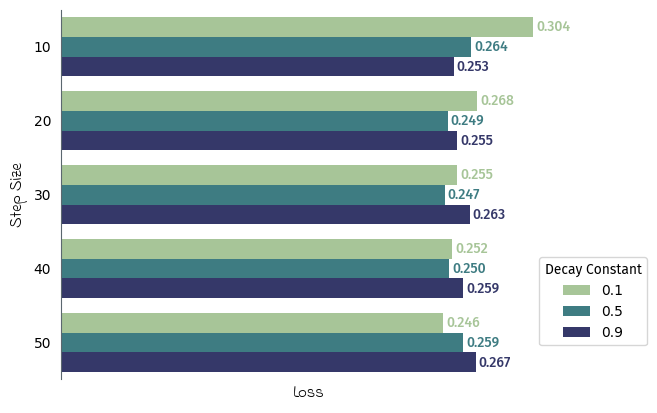

In [29]:
# Plot data
with sns.axes_style({"axes.edgecolor": anthracite}):
    ax = sns.barplot(
        data=lr_schedule,
        x="Loss",
        y="step_size",
        orient="y",
        hue="gamma",
        palette="crest"
    )

# Add axis labels
ax.set_xlabel("Loss", font=indie_flower, size=12)
ax.set_ylabel("Step Size", font=indie_flower, size=12)

# Customize legend
ax.legend(
    loc="upper left",
    bbox_to_anchor=(0.95, 0.35),
    title="Decay Constant",
    title_fontproperties=FontProperties(family="Fira Sans")
)

# Add bar labels
for grouped_bars in ax.containers:
    for bar in grouped_bars:
        # Mimic label positioning of ax.bar_label() with paddding=2
        (_, y0), (x1, y1) = bar.get_bbox().get_points()
        yc = (y0 + y1) / 2
        xy = x1, yc
        xytext = 2, 0
        lbl = f"{x1:.3f}"
        ax.annotate(
            lbl, xy, xytext, textcoords="offset points", ha="left", va="center",
            fontname="Fira Sans",
            weight="roman",
            color=bar.get_facecolor()
        )

# Control figure aesthetics
sns.despine(ax=ax, bottom=True)
ax.tick_params(left=False, bottom=False, labelbottom=False)

fig_lr_schedule_loss = ax.get_figure()
plt.show()

In [30]:
save_figure(
    fig_lr_schedule_loss,
    "../reports/figures/lenet_fashionmnist/grid_search/lr_schedule/loss.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/lr_schedule/loss.png.


### Analyze Training Results (# Epochs)

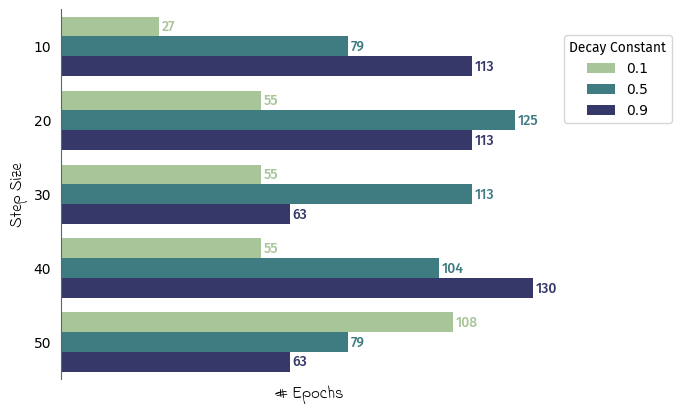

In [31]:
# Plot data
with sns.axes_style({"axes.edgecolor": anthracite}):
    ax = sns.barplot(
        data=lr_schedule,
        x="Epochs",
        y="step_size",
        orient="y",
        hue="gamma",
        palette="crest"
    )

# Add axis labels
ax.set_xlabel("# Epochs", font=indie_flower, size=12)
ax.set_ylabel("Step Size", font=indie_flower, size=12)

# Customize legend
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 0.95),
    title="Decay Constant",
    title_fontproperties=FontProperties(family="Fira Sans")
)

# Add bar labels
for grouped_bars in ax.containers:
    for bar in grouped_bars:
        # Mimic label positioning of ax.bar_label() with paddding=2
        (_, y0), (x1, y1) = bar.get_bbox().get_points()
        yc = (y0 + y1) / 2
        xy = x1, yc
        xytext = 2, 0
        lbl = f"{x1:.0f}"
        ax.annotate(
            lbl, xy, xytext, textcoords="offset points", ha="left", va="center",
            fontname="Fira Sans",
            weight="roman",
            color=bar.get_facecolor()
        )

# Control figure aesthetics
sns.despine(ax=ax, bottom=True)
ax.tick_params(left=False, bottom=False, labelbottom=False)

fig_lr_schedule_epochs = ax.get_figure()
plt.show()

In [32]:
save_figure(
    fig_lr_schedule_epochs,
    "../reports/figures/lenet_fashionmnist/grid_search/lr_schedule/epochs.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/lr_schedule/epochs.png.


## Control: Random Cropping


### Crop Scale (Lower Bound)


#### Analyze Training Results

In [33]:
# Load and prepare data
control_scale = parse_log_dir(
    "../out/lenet_fashionmnist/data_augmentation/random_cropping_control/scale/2024-09-25_12-26-34",
    get_training_results,
    mode="val"
)
control_scale = control_scale.drop(columns="Accuracy@5")
control_scale = control_scale.rename(columns={"Accuracy@1": "Acc@1"})

# Add results from initial random cropping experiment for comparison
previous_results = random_crops[random_crops["crop_scale.lower"].isin([0.6, 0.8, 1.0])]
previous_results = previous_results.drop(columns=["config_id"])
control_scale = pd.concat([control_scale, previous_results], axis=0)
control_scale = control_scale.sort_values(by=["b", "momentum", "crop_scale.lower"]).reset_index(drop=True)

# Add ID to identify runs with identical hparams (except for crop_scale.lower)
control_scale["config_id"] = control_scale.groupby(["b", "momentum"]).ngroup() + 1
control_scale = control_scale.sort_values(by=["config_id", "crop_scale.lower"])
control_scale

,b,crop_scale.lower,momentum,Loss,Acc@1,Epochs,config_id
0,64,0.2,0.80,0.300,0.888,104,1
1,64,0.4,0.80,0.287,0.892,107,1
2,64,0.6,0.80,0.270,0.898,93,1
3,64,0.8,0.80,0.267,0.901,63,1
4,64,1.0,0.80,0.270,0.903,48,1
5,64,0.2,0.85,0.323,0.883,59,2
6,64,0.4,0.85,0.286,0.895,113,2
7,64,0.6,0.85,0.267,0.898,93,2
8,64,0.8,0.85,0.262,0.902,80,2
9,64,1.0,0.85,0.268,0.901,30,2


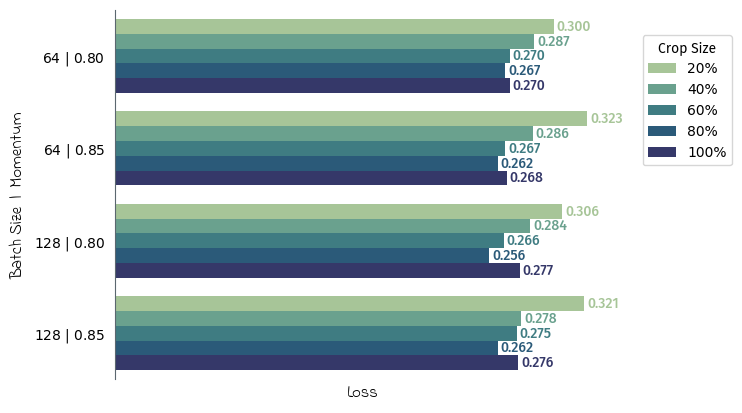

In [34]:
# Plot data
with sns.axes_style({"axes.edgecolor": anthracite}):
    ax = sns.barplot(
        data=control_scale,
        x="Loss",
        y="config_id",
        orient="y",
        hue="crop_scale.lower",
        palette="crest"
    )

# Add axis labels
ax.set_xlabel("Loss", font=indie_flower, size=12)
ax.set_ylabel("Batch Size  |  Momentum", font=indie_flower, size=12)

# Modify tick labels
config_dict = {}
for unique_id in random_crops["config_id"].unique():
    data = random_crops[random_crops["config_id"] == unique_id].iloc[0]
    config_dict[unique_id] = f"${data['b'].astype(int)}$ | ${data['momentum']:.2f}$"
ax.set_yticks(range(0, 4))
ax.set_yticklabels(config_dict[int(ylabel.get_text())] for ylabel in ax.get_yticklabels())

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=[f"{float(l) * 100:.0f}%" for l in labels],
    loc="upper left",
    bbox_to_anchor=(1.05, 0.95),
    title="Crop Size",
    title_fontproperties=FontProperties(family="Fira Sans")
)

# Add bar labels
for grouped_bars in ax.containers:
    for bar in grouped_bars:
        # Mimic label positioning of ax.bar_label() with paddding=2
        (_, y0), (x1, y1) = bar.get_bbox().get_points()
        yc = (y0 + y1) / 2
        xy = x1, yc
        xytext = 2, 0
        lbl = f"{x1:.3f}"
        ax.annotate(
            lbl, xy, xytext, textcoords="offset points", ha="left", va="center",
            fontname="Fira Sans",
            weight="roman",
            color=bar.get_facecolor()
        )

# Control figure aesthetics
sns.despine(ax=ax, bottom=True)
ax.tick_params(left=False, bottom=False, labelbottom=False)

fig_control_scale = ax.get_figure()
plt.show()

In [35]:
save_figure(
    fig_control_scale,
    "../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping_control/scale.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping_control/scale.png.


### Crop Ratio


#### Analyze Training Results

In [36]:
# Load and prepare data
control_ratio = parse_log_dir(
    "../out/lenet_fashionmnist/data_augmentation/random_cropping_control/ratio/2024-09-26_10-31-45",
    get_training_results,
    mode="val"
)
control_ratio = control_ratio.drop(columns="Accuracy@5")
control_ratio = control_ratio.rename(columns={"Accuracy@1": "Acc@1"})

# Add results from initial random cropping experiment (crop_ratio = (1.0, 1.0)) for comparison
previous_results = random_crops[random_crops["crop_scale.lower"].isin([0.7, 0.8, 0.9, 1.0])]
previous_results = previous_results.drop(columns=["config_id"])
previous_results["crop_ratio.lower"] = 1.0
control_ratio = pd.concat([control_ratio, previous_results], axis=0)
control_ratio["crop_ratio.lower"] = control_ratio["crop_ratio.lower"].round(2)
control_ratio = control_ratio.sort_values(by=["crop_ratio.lower", "crop_scale.lower", "b", "momentum"]).reset_index(drop=True)
control_ratio

,b,crop_ratio.lower,crop_scale.lower,momentum,Loss,Acc@1,Epochs
0,64,0.67,0.7,0.80,0.276,0.896,108
1,64,0.67,0.7,0.85,0.278,0.895,98
2,128,0.67,0.7,0.80,0.283,0.893,73
3,128,0.67,0.7,0.85,0.275,0.896,73
4,64,0.67,0.8,0.80,0.275,0.897,47
...,...,...,...,...,...,...,...
59,128,1.00,0.9,0.85,0.263,0.904,67
60,64,1.00,1.0,0.80,0.270,0.903,48
61,64,1.00,1.0,0.85,0.268,0.901,30
62,128,1.00,1.0,0.80,0.277,0.904,51


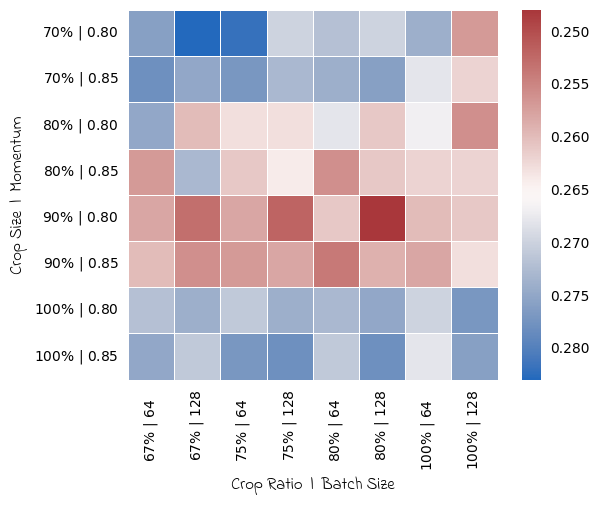

In [37]:
# Plot data
ax = sns.heatmap(
    control_ratio.pivot_table(
        values=["Loss"],
        index=["crop_scale.lower", "momentum"],
        columns=["crop_ratio.lower", "b"]
    ),
    cmap="vlag_r",
    linewidth=.5,
    square=True
)

# Add axis labels
ax.set_xlabel("Crop Ratio  |  Batch Size", font=indie_flower, size=12)
ax.set_ylabel("Crop Size  |  Momentum", font=indie_flower, size=12)

# Modify tick labels
xticklabels = []
yticklabels = []
for xlabel in ax.get_xticklabels():
    _, crop_ratio, batch_size = xlabel.get_text().split("-")
    crop_ratio = float(crop_ratio) * 100
    entry = f"${crop_ratio:.0f}\%$ | ${batch_size}$"
    if int(batch_size) == 64:
        entry += "   "
    xticklabels.append(entry)
for ylabel in ax.get_yticklabels():
    crop_size, momentum = ylabel.get_text().split("-")
    crop_size = float(crop_size) * 100
    entry = f"${crop_size:.0f}\%$ | ${float(momentum):.2f}$"
    yticklabels.append(entry)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)

# Control figure aesthetics
ax.tick_params(left=False, bottom=False)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False)
cbar.ax.invert_yaxis()

fig_control_ratio = ax.get_figure()
plt.show()

In [38]:
save_figure(
    fig_control_ratio,
    "../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping_control/ratio.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping_control/ratio.png.


## Grid Search: Final Baseline


### Analyze Training Results

In [39]:
# Load and prepare data
baseline_final = parse_log_dir(
    "../out/lenet_fashionmnist/grid_search/baseline_final/2024-09-26_14-27-02",
    get_training_results,
    mode="val"
)
baseline_final = baseline_final.drop(columns="Accuracy@5")
baseline_final = baseline_final.rename(columns={"Accuracy@1": "Acc@1"})
baseline_final = baseline_final.sort_values(by=["Loss", "Acc@1"], ascending=[True, False])
baseline_final.head(10)

,b,crop_ratio.lower,crop_scale.lower,gamma,lr,momentum,wd,Loss,Acc@1,Epochs
45,64,0.80,0.8,0.5,0.10,0.8,0.001,0.231,0.920,217
21,64,0.75,0.9,0.1,0.10,0.8,0.001,0.232,0.916,74
117,128,0.80,0.9,0.1,0.10,0.8,0.001,0.233,0.914,87
37,64,0.80,0.8,0.1,0.10,0.8,0.001,0.234,0.915,116
87,128,0.75,0.9,0.1,0.10,0.9,0.001,0.234,0.915,108
53,64,0.80,0.9,0.1,0.10,0.8,0.001,0.235,0.913,87
19,64,0.75,0.9,0.1,0.01,0.9,0.001,0.237,0.914,63
95,128,0.75,0.9,0.5,0.10,0.9,0.001,0.237,0.913,126
69,128,0.75,0.8,0.1,0.10,0.8,0.001,0.237,0.911,109
119,128,0.80,0.9,0.1,0.10,0.9,0.001,0.238,0.915,90


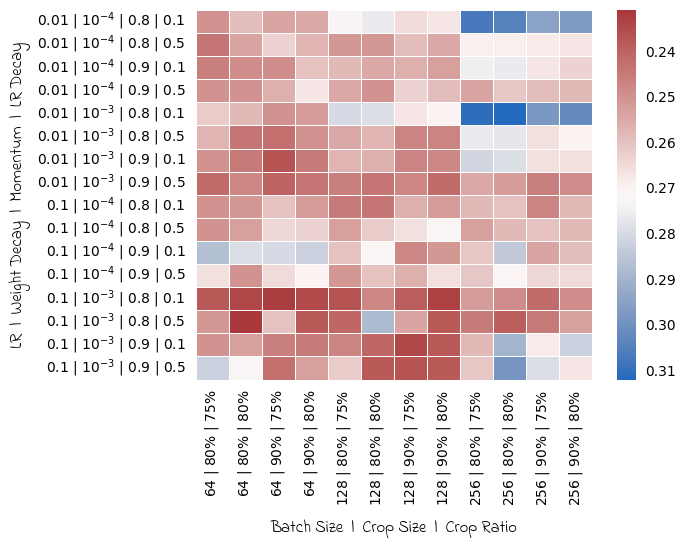

In [40]:
# Plot data
ax = sns.heatmap(
    baseline_final.pivot_table(
        values=["Loss"],
        index=["lr", "wd", "momentum", "gamma"],
        columns=["b", "crop_scale.lower", "crop_ratio.lower"]
    ),
    cmap="vlag_r",
    linewidth=.5
)

# Add axis labels
ax.set_xlabel("Batch Size  |  Crop Size  |  Crop Ratio", font=indie_flower, size=12, labelpad=10)
ax.set_ylabel("LR  |  Weight Decay  |  Momentum  |  LR Decay", font=indie_flower, size=12)

# Modify tick labels
wd_mapping = {1e-4: "$10^{-4}$", 1e-3: "$10^{-3}$"}
xticklabels = []
yticklabels = []
for xlabel in ax.get_xticklabels():
    _, batch_size, crop_size, crop_ratio = xlabel.get_text().split("-")
    # batch_size = int(batch_size)
    crop_size = float(crop_size) * 100
    crop_ratio = float(crop_ratio) * 100
    entry = f"${batch_size}$ | ${crop_size:.0f}\%$ | ${crop_ratio:.0f}\%$"
    xticklabels.append(entry)
for ylabel in ax.get_yticklabels():
    lr, wd, momentum, gamma = ylabel.get_text().split("-")
    entry = f"${lr}$ | {wd_mapping[float(wd)]} | ${momentum}$ | ${gamma}$"
    yticklabels.append(entry)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)

# Control figure aesthetics
ax.tick_params(left=False, bottom=False)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False)
cbar.ax.invert_yaxis()

fig_baseline_final = ax.get_figure()
plt.show()

In [41]:
save_figure(
    fig_baseline_final,
    "../reports/figures/lenet_fashionmnist/grid_search/baseline_final/results.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/baseline_final/results.png.


### Results of Cross-Validation (Top-5)

First, we implement a helper function that extracts the hyperparameters from a single run of training and combines them into a string.

In [42]:
def _get_hparams(ser: pd.Series) -> str:
    hparams = (
        f"b={ser['b']},crop_ratio.lower={ser['crop_ratio.lower']},crop_scale.lower={ser['crop_scale.lower']},"
        f"gamma={ser['gamma']},lr={ser['lr']},momentum={ser['momentum']},wd={ser['wd']}"
    )
    return hparams


Next, we load the results of the cross-validation runs and prepare the data.

In [43]:
# Extract hyperparameters of top-5 performing combinations (single training runs)
top_5 = baseline_final.copy()
top_5 = top_5.sort_values(by="Loss")[:5]
top_5["run"] = "single"
top_5["run_id"] = 1
config_dict = {}
for idx, row in enumerate(top_5.iterrows()):
    hparams = _get_hparams(row[1])
    config_dict[hparams] = idx + 1

# Load and prepare data
log_dir = "../out/lenet_fashionmnist/grid_search/baseline_final_cv/2024-10-04_21-42-22"
baseline_final_cv = parse_log_dir(
    log_dir,
    get_training_results,
    mode="val"
)
baseline_final_cv = baseline_final_cv.drop(columns="Accuracy@5")
baseline_final_cv = baseline_final_cv.rename(columns={"Accuracy@1": "Acc@1"})
baseline_final_cv["run"] = "cv"

baseline_final_cv = pd.concat([top_5, baseline_final_cv], axis=0, ignore_index=True)
baseline_final_cv["config_id"] = baseline_final_cv.apply(lambda row: config_dict[_get_hparams(row)], axis=1)
baseline_final_cv = baseline_final_cv.sort_values(by=["config_id", "run", "run_id"], ascending=[True, False, True])
baseline_final_cv

,b,crop_ratio.lower,crop_scale.lower,gamma,lr,momentum,wd,Loss,Acc@1,Epochs,run,run_id,config_id
0,64,0.80,0.8,0.5,0.1,0.8,0.001,0.231,0.920,217,single,1,1
25,64,0.80,0.8,0.5,0.1,0.8,0.001,0.265,0.901,63,cv,1,1
26,64,0.80,0.8,0.5,0.1,0.8,0.001,0.266,0.902,61,cv,2,1
27,64,0.80,0.8,0.5,0.1,0.8,0.001,0.247,0.911,63,cv,3,1
28,64,0.80,0.8,0.5,0.1,0.8,0.001,0.269,0.904,66,cv,4,1
29,64,0.80,0.8,0.5,0.1,0.8,0.001,0.229,0.916,121,cv,5,1
30,64,0.80,0.8,0.5,0.1,0.8,0.001,0.222,0.921,102,cv,6,1
31,64,0.80,0.8,0.5,0.1,0.8,0.001,0.214,0.924,154,cv,7,1
32,64,0.80,0.8,0.5,0.1,0.8,0.001,0.290,0.894,36,cv,8,1
33,64,0.80,0.8,0.5,0.1,0.8,0.001,0.239,0.914,99,cv,9,1


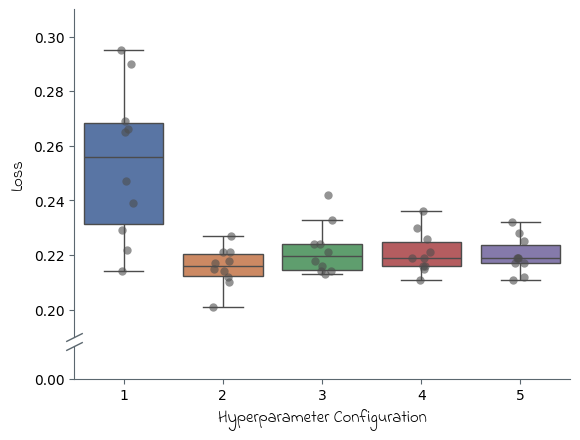

In [44]:
# Prepare plot with "broken" axis
# Adapted from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html
with sns.axes_style({"axes.edgecolor": anthracite}):
    fig_baseline_final_cv, (ax_top, ax_bottom) = plt.subplots(
        nrows=2,
        ncols=1,
        sharex=True,
        gridspec_kw={
            "height_ratios": [10, 1],
            "hspace": 0.05
        }
    )
kwargs = dict(
    marker=[(-1, -.5), (1, .5)],
    markersize=12,
    linestyle="none",
    mec=anthracite,
    mew=1,
    clip_on=False
)
ax_top.plot(0, transform=ax_top.transAxes, **kwargs)
ax_bottom.plot(1, transform=ax_bottom.transAxes, **kwargs)
ax_bottom.set_ylim(0, 1)

# Plot data
sns.boxplot(
    data=baseline_final_cv[baseline_final_cv["run"] == "cv"],
    x="config_id",
    y="Loss",
    hue="config_id",
    palette="deep",
    ax=ax_top,
    showfliers=False,
    legend=False
)
np.random.seed(0)
sns.stripplot(
    data=baseline_final_cv[baseline_final_cv["run"] == "cv"],
    x="config_id",
    y="Loss",
    jitter=True,
    color=".3",
    size=6,
    ax=ax_top,
    alpha=0.6
)

# Add axis labels
ax_bottom.set_xlabel("Hyperparameter Configuration", font=indie_flower, size=12)
ax_top.set_ylabel("Loss", font=indie_flower, size=12)
ax_top.set_xlabel("")
ax_bottom.set_ylabel("")

# Modify tick labels
ax_bottom.set_yticks([0])
ax_bottom.set_yticklabels([f"{0:.2f}"])

# Control figure aesthetics
ax_top.set_ylim(0.19, 0.31)
sns.despine(ax=ax_top, bottom=True)
sns.despine(ax=ax_bottom)
ax_top.tick_params(bottom=False, color=anthracite)
ax_bottom.tick_params(color=anthracite)

plt.show()

In [45]:
save_figure(
    fig_baseline_final_cv,
    "../reports/figures/lenet_fashionmnist/grid_search/baseline_final_cv/results.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/baseline_final_cv/results.png.
